In [1]:
%matplotlib notebook
from IPython.core.display import display, HTML

# DYFI demo

Import python modules

In [2]:
import eqcatalog

## Query the databasse

Specify which earthquake to work with

In [3]:
## Alsdorf 2002
#id_earth = 1306
## Kinrooi 2018
id_earth = 6625
ID_EARTH = id_earth

Direct query

In [4]:
rob_dyfi = eqcatalog.rob.query_online_macro_catalog(id_earth)
rob_dyfi

<ROBDYFIEnsemble (n=1668)>

Query through ROBLocalEarthquake instance

In [21]:
[eq] = eqcatalog.rob.query_local_eq_catalog_by_id(id_earth)
rob_dyfi = eq.get_online_macro_enquiries()
rob_dyfi

<ROBDYFIEnsemble (n=1668)>

Query options

In [9]:
eqcatalog.rob.query_online_macro_catalog?

'id_earth':
- ROB earthquake ID: enquiries assigned to single earthquake
- event type (e.g., 'ke', 'ke,ki', 'all'): enquiries assigned to given event type(s)
- date: unassigned enquiries from partcular date
- None: all unassigned enquiries

'id_com': Limit query to one or several communes (default: None)

In [10]:
id_earth = 'ke'
id_com = eqcatalog.rob.zip2ID(9000)
eqcatalog.rob.query_online_macro_catalog(id_earth, id_com=id_com)

<ROBDYFIEnsemble (n=307)>

'zip_code': similar to 'id_com'

In [11]:
id_earth = 'ke'
zip_code = 1180
eqcatalog.rob.query_online_macro_catalog(id_earth, zip_code=zip_code)

<ROBDYFIEnsemble (n=220)>

'min_fiability': minimum reliability assigned to DYFI form (default: 80)

In [12]:
id_earth = ID_EARTH
min_fiability = 90
eqcatalog.rob.query_online_macro_catalog(id_earth, min_fiability=min_fiability)

<ROBDYFIEnsemble (n=1283)>

'min_location_quality': minimum quality of location to read from web_location table (default: 6)

In [14]:
id_earth = ID_EARTH
min_location_quality = 6
eqcatalog.rob.query_online_macro_catalog(id_earth, min_location_quality=min_location_quality)

<ROBDYFIEnsemble (n=1668)>

## Locations

By default, locations are read from the database, but they are not always present

In [15]:
rob_dyfi.longitudes

array([5.4432,    nan, 5.5233, ...,    nan,    nan, 5.579 ])

It is possible to set the locations from the commune locations

In [23]:
rob_dyfi.set_locations_from_communes(keep_unmatched=True, max_quality=9)

Set location for 1668 records, removed location for 0 unmatched records


If necessary, locations can be read from db again

In [26]:
rob_dyfi.read_locations_from_db()

{36775: {'id_web': 36775,
  'latitude': 50.7751,
  'longitude': 5.4432,
  'quality': 9,
  'lastmod': datetime.datetime(2019, 2, 6, 11, 5, 18)},
 36780: {'id_web': 36780,
  'latitude': 50.8374,
  'longitude': 5.5233,
  'quality': 6,
  'lastmod': datetime.datetime(2019, 2, 6, 11, 5, 18)},
 36785: {'id_web': 36785,
  'latitude': 50.6969,
  'longitude': 5.2521,
  'quality': 9,
  'lastmod': datetime.datetime(2019, 2, 6, 11, 5, 18)},
 36795: {'id_web': 36795,
  'latitude': 50.7661,
  'longitude': 5.4389,
  'quality': 9,
  'lastmod': datetime.datetime(2019, 2, 6, 11, 5, 18)},
 36800: {'id_web': 36800,
  'latitude': 50.796,
  'longitude': 5.6147,
  'quality': 6,
  'lastmod': datetime.datetime(2019, 2, 6, 11, 5, 18)},
 36810: {'id_web': 36810,
  'latitude': 50.8849,
  'longitude': 5.6758,
  'quality': 9,
  'lastmod': datetime.datetime(2019, 2, 6, 11, 5, 18)},
 36815: {'id_web': 36815,
  'latitude': 50.8048,
  'longitude': 5.6733,
  'quality': 6,
  'lastmod': datetime.datetime(2019, 2, 6, 11, 5,

In [6]:
rob_dyfi.set_locations_from_geolocation(keep_unmatched=False)

Set location for 1322 records, removed location for 346 unmatched records


There is also a method to write locations back to database, but use with caution!

In [7]:
rob_dyfi.write_locations_to_db?

In [33]:
rob_dyfi.get_addresses()[:50]

['KEMPENSTRAAT 1, 3700 TONGEREN, BE',
 'BUVINGENSTRAAT, NIEL-BIJ-ST.-TRUIDEN, 3890 GINGELOM, BE',
 'WINTERBERGSTRAAT, 3740 BILZEN, BE',
 'RUE SOUS LE CHATEAU 56, 4300 WAREMME, BE',
 '',
 'KORENBLOEMSTRAAT 10., 3700 TONGEREN, BE',
 'BURGENMEESTER DEWALQUENSTRAAT, 3770 RIEMST, BE',
 'SCHIPPERDSTRAAT 15, 3620 LANAKEN, BE',
 'CHAUSSEE DES GRENADIERS EBEN EMAEL, 4690 BASSENGE, BE',
 'LOOSTRAAT, 3724 VLIERMAAL, BE',
 '',
 'BODEMSTRAAT, 3770 RIEMST, BE',
 '',
 'KASTEELSTRAAT, 3740 BILZEN, BE',
 '',
 'RUE DE LA CENTENAIRE 26, 4360 OREYE, BE',
 '',
 '',
 'HONSDRIES 14, 3640 OPHOVEN, BE',
 '',
 'MELLEVELDSTRAAT, 3730 , BE',
 'HOEVEEKERKWEG 53, 3660 OPGLABBEEK, BE',
 'RUE LENOIR 9, 4350 MOMALLE, BE',
 'KEISTRAAT, 3740 BILZEN, BE',
 'LINDEBOSSTRAAT 56, 3600 GENK, BE',
 'RONDESTRAAT (LOZEN), 3950 BOCHOLT, BE',
 'SPARRENLAAN 8, 3730 HOESELT, BE',
 '',
 '',
 '',
 '',
 'BORGOGNESTRAAT 18, 6221 MAASTRICHT, NL',
 'PETER BENOITSTRAAT 64A, 3500 HASSELT, BE',
 'MEREMWAG 29, 3740 BILZEN, BE',
 '',
 'KEISTRA

## DYFIEnsemble and ROBDYFIEnsemble classes

There are 2 classes:
- DYFIEnsemble: Generic DYFI ensemble
- ROBDYFIEnsemble: DYFI ensemble linked to database records

In contrast to MDPCollection, there is currently no class for a single DYFI form

ROBDYFIEnsemble can be converted to DYFIEnsemble

In [5]:
dyfi = rob_dyfi.to_simple_dyfi_ensemble()
dyfi

Fixed 124 communes by zip/name, 88 by zip only, 0 unmatched
Set location for 1668 records, removed location for 0 unmatched records
Fixed 110/110 felt values
Set 412 motion/reaction/stand values


<DYFIEnsemble (n=1668)>

Database records are available as 'recs' property in ROBDYFIEnsemble

In [26]:
rob_dyfi.recs[0]

{'id_web': 36775,
 'event': '20180525',
 'region': 'belgique',
 'time_month': 5,
 'time_day': 25,
 'time_year': 2018,
 'time_hrmin': datetime.timedelta(seconds=73911),
 'time_ampm': 'PM',
 'remote_host': 'd54C1B3C6.access.telenet.be',
 'remote_addr': '84.193.179.198',
 'user_agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_6 like Mac OS X) AppleWebKit/604.5.6 (KHTML, like Gecko) Version/11.0 Mobile/15D100 Safari/604.1',
 'name': 'Ilse bauwens',
 'lang': 'NL',
 'email': 'info@exclusivebull.com',
 'phone': '0473200875',
 'street': 'Kempenstraat 1',
 'city': 'Tongeren',
 'zip': '3700',
 'id_zip': 1193,
 'country': 'BE',
 'state': None,
 'situation': '1',
 'building': '1',
 'floor': 1,
 'buother': None,
 'asleep': '0',
 'noise': '0',
 'felt': '1',
 'other_felt': '0',
 'motion': '1',
 'duration': 1,
 'reaction': '3',
 'response': '0',
 'resp_other': None,
 'stand': '0',
 'sway': 'A',
 'creak': 'A',
 'shelf': 'A',
 'picture': 'A',
 'furniture': '0',
 'heavy_appliance': '0',
 'walls': '0',
 '

## Fix various issues

Fix missing commune IDs based on ZIP and country

In [9]:
rob_dyfi.fix_commune_ids(keep_existing=True, keep_unmatched=False)

Fixed 124 communes by zip/name, 88 by zip only, 19 unmatched


Fix enquiries where 'felt' has not been filled out, based on reply to 'asleep', 'motion' and 'stand' questions.

In [11]:
rob_dyfi.fix_felt_is_none()

Fixed 110/110 felt values


For 'not felt' enquiries, set motion, reaction and stand to 0

In [13]:
rob_dyfi.fix_not_felt()

Set 412 motion/reaction/stand values


In [25]:
rob_dyfi.remove_duplicate_records()

Duplicate streets:
  3700 [CII=1.0, fiab=90] b'Ilse Simenon' - b'Necropolisstraat 7 Tongeren'
  3700 [CII=3.44879, fiab=90] b'Ilse Simenon' - b'Necropolisstraat 7 Tongeren'

  3950 [CII=1.0, fiab=90] b'Tom Adriaensen' - b'Reppelerweg 34'
  3950 [CII=1.0, fiab=90] b'Tom Adriaensen' - b'Reppelerweg 34'

  3770 [CII=2.6901, fiab=90] b'Jonah Fastr?' - b'Dorpsstraat 75'
  3770 [CII=2.6901, fiab=90] b'Jonah Fastr?' - b'Dorpsstraat 75'

  3570 [CII=2.6901, fiab=90] b'Frederix Nicole' - b'ZEVENBOOMKENSSTRAAT 2 bus 11'
  3570 [CII=2.6901, fiab=90] b'Frederix Nicole' - b'ZEVENBOOMKENSSTRAAT 2 bus 11'

  3700 [CII=2.0, fiab=90] b'Digneffe' - b'A.meesenlaan 10'
  3700 [CII=2.0, fiab=90] b'Digneffe' - b'A.meesenlaan 10'

  4260 [CII=1.0, fiab=90] b'Dehout' - b"rue de l'O N U, 3"
  4260 [CII=1.0, fiab=90] b'Dehout' - b"rue de l'O N U, 3"

  3800 [CII=2.0, fiab=90] b'Royen Nele' - b'Barettestraat 4'
  3800 [CII=2.0, fiab=90] b'Royen Nele' - b'Barettestraat 4'

  3680 [CII=2.6901, fiab=90] b'Schepers 

<ROBDYFIEnsemble (n=1644)>

## Indexing, slicing and looping

(ROB)DYFIEnsemble instances can be indexed, sliced and looped over

In [14]:
rob_dyfi[0]

<ROBDYFIEnsemble (n=1)>

In [15]:
rob_dyfi[-10:]

<ROBDYFIEnsemble (n=10)>

In [16]:
rob_dyfi[rob_dyfi.CII > 2]

<ROBDYFIEnsemble (n=1206)>

In [18]:
for dyfi_rec in rob_dyfi:
    pass
dyfi_rec

<ROBDYFIEnsemble (n=1)>

## Class attributes

All replies (felt, other_felt, asleep, ...) and derived quantities (CDI, CII, MI, fiability) can be accessed as arrays

In [20]:
rob_dyfi.CII[:50]

array([3.09056, 2.23609, 2.6901 , 4.06868, 2.23609, 3.09056, 2.23609,
       2.23609, 3.09056, 3.44879, 1.     , 4.06868, 4.71211, 3.09056,
       1.     , 3.09056, 3.77284, 2.     , 3.09056, 3.77284, 3.09056,
       2.6901 , 2.6901 , 3.44879, 3.44879, 3.77284, 3.44879, 1.     ,
       3.44879, 3.44879, 2.     , 3.44879, 2.23609, 3.09056, 2.6901 ,
       2.23609, 3.44879, 4.34083, 3.09056, 2.6901 , 2.23609, 3.77284,
       3.09056, 3.09056, 2.     , 3.09056, 2.23609, 2.6901 , 2.23609,
       2.23609])

In [21]:
rob_dyfi.asleep[:50]

array([0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0.,
       0., 2., 2., 2., 2., 0., 2., 0., 0., 2., 2., 0., 2., 0., 0., 0.])

Other database fields can be queried like this (ROBDYFIEnsemble only):

In [28]:
rob_dyfi.get_prop_values('id_com')

[4150,
 3833,
 4050,
 3780,
 4163,
 4150,
 4136,
 4127,
 3264,
 4120,
 3809,
 4136,
 4136,
 4050,
 2068,
 3756,
 4136,
 4136,
 3978,
 4150,
 4109,
 3896,
 3768,
 4050,
 3828,
 3950,
 4109,
 4109,
 4079,
 4079,
 3896,
 10000,
 3855,
 4050,
 4037,
 4056,
 4150,
 4150,
 3957,
 3988,
 3828,
 3957,
 3988,
 3828,
 4029,
 3957,
 4121,
 3977,
 3957,
 4173,
 4150,
 3950,
 3983,
 3989,
 4136,
 0,
 4059,
 4050,
 3957,
 4063,
 3957,
 4087,
 4079,
 4130,
 4109,
 3975,
 664,
 4109,
 3926,
 4145,
 3896,
 3989,
 4181,
 3766,
 4142,
 4068,
 3995,
 3988,
 3988,
 4130,
 4150,
 3990,
 4150,
 3988,
 3995,
 3957,
 3957,
 3957,
 3988,
 3828,
 4068,
 4050,
 3975,
 4001,
 4150,
 3823,
 4068,
 62220,
 4143,
 3957,
 3983,
 4109,
 929,
 1604,
 3988,
 4136,
 4143,
 4136,
 4014,
 4055,
 3896,
 4038,
 4119,
 3989,
 4050,
 3931,
 4035,
 4119,
 4040,
 917,
 808,
 4068,
 4057,
 4136,
 4050,
 4001,
 3990,
 833,
 3951,
 3988,
 4006,
 3896,
 3249,
 4109,
 4142,
 4150,
 4127,
 3815,
 3242,
 572,
 4111,
 3989,
 4150,
 1510,

Note that for ROBDYFIEnsemble, these arrays cannot be modified, as they are linked to the internally stored database records.

In [22]:
rob_dyfi.CII[0] = 3

ValueError: assignment destination is read-only

Modifications need to be done to the internally stored database records. The arrays are automatically regenerated.

In [29]:
rob_dyfi.set_prop_values?

In [31]:
rob_dyfi.latitudes[:50]

array([50.781 ,     nan, 50.87  , 50.704 ,     nan, 50.781 , 50.8097,
       50.8903, 50.7611, 50.8417,     nan, 50.8097,     nan, 50.87  ,
           nan, 50.7294,     nan,     nan, 51.1322,     nan,     nan,
       51.0447, 50.6867, 50.87  , 50.965 , 51.1733, 50.8511,     nan,
           nan,     nan,     nan, 50.8494, 50.931 , 50.87  ,     nan,
       50.8342, 50.781 ,     nan, 51.1419, 51.096 , 50.965 , 51.1419,
       51.096 , 50.965 , 51.0567, 51.1419, 50.8656, 51.1456, 51.1419,
           nan])

In [30]:
rob_dyfi.event_longitudes[:50]

array([5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872,
       5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872,
       5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872,
       5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872,
       5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872,
       5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872, 5.6872,
       5.6872, 5.6872])

In [32]:
rob_dyfi.submit_times[:50]

array(['2018-05-26T00:50:04', '2018-05-26T00:49:16',
       '2018-05-26T00:55:58', '2018-05-26T00:56:22',
       '2018-05-26T00:58:12', '2018-05-26T00:58:39',
       '2018-05-26T01:01:12', '2018-05-26T01:03:32',
       '2018-05-26T01:03:41', '2018-05-26T01:05:47',
       '2018-05-26T01:06:29', '2018-05-26T01:09:50',
       '2018-05-26T01:10:29', '2018-05-26T01:15:36',
       '2018-05-26T01:18:11', '2018-05-26T01:18:39',
       '2018-05-26T01:23:12', '2018-05-26T01:27:02',
       '2018-05-26T01:34:38', '2018-05-26T02:25:50',
       '2018-05-26T02:20:07', '2018-05-26T02:32:54',
       '2018-05-26T01:42:05', '2018-05-26T04:16:26',
       '2018-05-26T04:47:45', '2018-05-26T06:04:30',
       '2018-05-26T06:05:33', '2018-05-26T06:35:08',
       '2018-05-26T06:57:18', '2018-05-26T06:57:19',
       '2018-05-26T07:02:13', '2018-05-26T07:03:13',
       '2018-05-26T07:05:48', '2018-05-26T07:09:25',
       '2018-05-26T07:11:01', '2018-05-26T07:18:58',
       '2018-05-26T07:19:30', '2018-05-26T07:2

## Subselecting

By property (ROBDYFIEnsemble only)

In [44]:
rob_dyfi.subselect_by_property('felt', [1])

<ROBDYFIEnsemble (n=1256)>

Subselection by distance / region / polygon: cf. MDPCollection

Filter by floor (stories)

In [76]:
min_level = 0
max_level = 4
dyfi.filter_floors(min_level, max_level, keep_nan_values=True)

<DYFIEnsemble (n=1656)>

## Explore replies and derived intensities

In [47]:
prop = 'other_felt'
dyfi.report_bincount(prop, include_labels=True, include_nan=False)

+-------+-------------+---------------------------------------------+
| Value | Num records |                    Label                    |
+-------+-------------+---------------------------------------------+
|   0   |     1136    | No answer / Don't know / Nobody else nearby |
|   1   |     300     |              No others felt it              |
|   2   |      80     |        Some felt it, but most did not       |
|   3   |     152     |    Most others felt it, but some did not    |
+-------+-------------+---------------------------------------------+


<IPython.core.display.Javascript object>


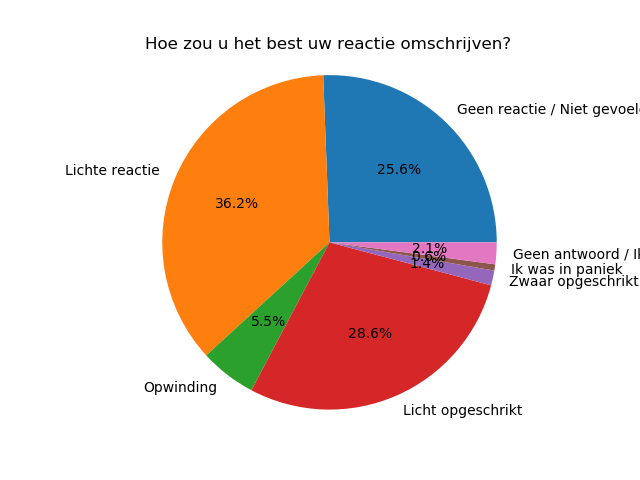

In [50]:
prop = 'reaction'
dyfi.plot_pie(prop, label_lang='nl')

<IPython.core.display.Javascript object>


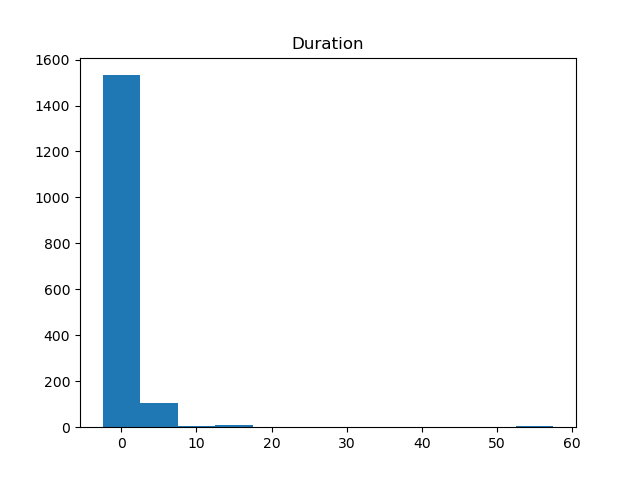

In [53]:
#prop = 'floor'
prop = 'duration'
dyfi.plot_histogram(prop)

<IPython.core.display.Javascript object>


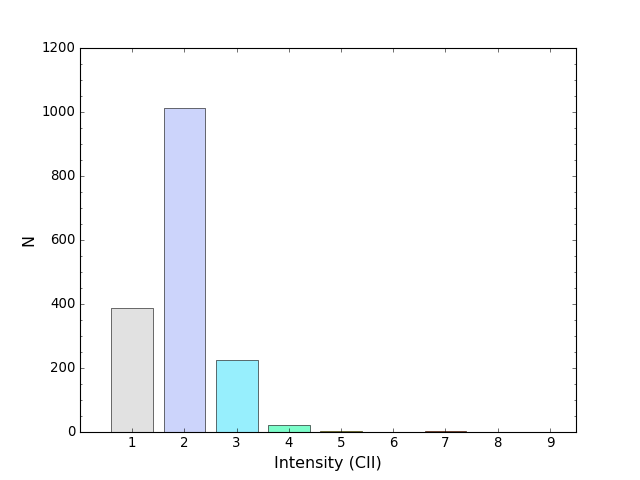

In [8]:
dyfi.plot_cii_histogram()

In [69]:
dyfi[:3].print_form(institute='usgs')

Were you asleep during the earthquake ?
  [ 0] No
  [ 1] No
  [ 2] Yes, but I woke up
<b>Did you feel the earthquake ?</b> (If you were asleep, did the earthquake wake you up?)
  [ 0] Yes
  [ 1] Yes
  [ 2] Yes
Did others nearby feel the earthquake ?
  [ 0] No answer / Don't know / Nobody else nearby
  [ 1] No answer / Don't know / Nobody else nearby
  [ 2] No answer / Don't know / Nobody else nearby
Was it difficult to stand or walk ?
  [ 0] No
  [ 1] No
  [ 2] No
How would you best describe the ground shaking ?
  [ 0] Weak
  [ 1] Weak
  [ 2] Mild
About how many seconds did the shaking last ?
  [ 0] 1.0
  [ 1] 4.0
  [ 2] 2.0
How would you best describe your reaction ?
  [ 0] Somewhat frightened
  [ 1] Very little reaction
  [ 2] Very little reaction
How did you respond ? (Select one.)
  [ 0] Took no action
  [ 1] Took no action
  [ 2] Took no action
Was it difficult to stand or walk ?
  [ 0] No
  [ 1] No
  [ 2] No
Did you notice the swinging or swaying of doors or hanging objects ?
  [

The following only works with ROBDYFIEnsemble

In [59]:
rob_dyfi[:100].report_by_commune()

+----------------------+-------+-------------+----------+----------------+
|       Commune        |   ID  | Num replies | Mean CII | Aggregated CII |
+----------------------+-------+-------------+----------+----------------+
|          AS          |  3809 |      1      |   1.0    |      2.0       |
|       BASSENGE       |  3264 |      1      |   3.1    |      2.5       |
|        BILZEN        |  4050 |      6      |   2.8    |      2.1       |
|       BOCHOLT        |  3950 |      2      |   3.2    |      2.7       |
|       BORGLOON       |  4068 |      3      |   2.5    |      2.0       |
|         BREE         |  3957 |      10     |   2.9    |      2.0       |
|      DIEPENBEEK      |  3823 |      1      |   1.0    |      2.0       |
|       EIJSDEN        | 62220 |      1      |   3.4    |      2.9       |
|         GENK         |  3828 |      4      |   3.1    |      2.3       |
|         GENT         |  2068 |      1      |   1.0    |      1.0       |
|       GINGELOM       | 

## Aggregation

Methods to compute aggregated intensity of an ensemble:
- 'mean': Mean of individual forms (ROB practice)
- 'dyfi': Using aggregated replies for each question (USGS/DYFI practice): see further
- 'mean-dyfi'
- 'dyfi-mean'

In [81]:
for agg_method in ('mean', 'dyfi'):
    I, residual = dyfi.get_aggregated_intensity(agg_method=agg_method)
    print('%s: I=%.1f' % (agg_method, I))

mean: I=2.1
dyfi: I=2.0


Similar to MDPCollection: aggregate by commune / distance / polygon_data / nothing

In [82]:
min_replies = 3
min_fiability = 80
filter_floors = (0, 4)
agg_method = 'dyfi'
ami_col = dyfi.aggregate_by_commune(min_replies=min_replies, min_fiability=min_fiability,
                                    filter_floors=filter_floors, agg_method=agg_method)
ami_col

Note: 16 enquiries are not assigned to a commune


<AggregatedMacroInfoCollection | by id_com | n=96 | internet>

The result is an AggregatedMacroInfoCollection instance, which can be used similar to what we saw in the Traditional macroseismic data demo.

Similar to MDPCollection, there are also corresponding split_by_ methods.

## Intensity calculation

The intensity measures in the ROB database (CDI = community decimal intensity and CII = community internet intensity) are computed from the CWS (community weighted sum) when the enquiry is submitted on the website. However, when information is modified in the database (e.g., correction of mistakes), these values are not updated.

In addition, I have also noted some differences with respect to the DYFI practice (see https://earthquake.usgs.gov/data/dyfi/background.php and Wald et al., 2012). In DYFI practice:
- CII/CDI is not computed as mean of CII/CDI of individual questionnaires, but from the aggregated indexes making up the CWS;
- The felt index is modified by the answer to the follow-up question "Did others feel it?" (= 'other_felt');
- The furniture index is computed from the 'furniture' question only, so does not take into account the answer to the 'heavy appliance' question;
- Damage index is different for some types of damage.

There are methods to calculate each index making up the CWS separately

In [87]:
dyfi.calc_felt_index(include_other_felt=True)

masked_array(data=[0.72, 0.72, 0.72, ..., 0.72, 1.0, 0.72],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [85]:
dyfi.calc_motion_index()

masked_array(data=[1.0, 1.0, 2.0, ..., 1.0, 1.0, 2.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [86]:
dyfi.calc_reaction_index()

masked_array(data=[3.0, 1.0, 1.0, ..., 3.0, 1.0, 3.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20)

In [88]:
dyfi.calc_shelf_index()

masked_array(data=[0.0, 0.0, 0.0, ..., --, 0.0, --],
             mask=[False, False, False, ...,  True, False,  True],
       fill_value=1e+20)

In [90]:
dyfi.calc_picture_index()

masked_array(data=[0.0, 0.0, 0.0, ..., --, 0.0, --],
             mask=[False, False, False, ...,  True, False,  True],
       fill_value=1e+20)

In [84]:
dyfi.calc_stand_index()

masked_array(data=[0.0, 0.0, 0.0, ..., --, 0.0, 0.0],
             mask=[False, False, False, ...,  True, False, False],
       fill_value=1e+20)

In [91]:
dyfi.calc_furniture_index(include_heavy_appliance=False)

masked_array(data=[0.0, 0.0, 0.0, ..., --, 0.0, 0.0],
             mask=[False, False, False, ...,  True, False, False],
       fill_value=1e+20)

In [92]:
dyfi.calc_damage_index()

array([0., 0., 0., ..., 0., 0., 0.])

Recompute CWS

In [93]:
dyfi.calc_cws(aggregate=False)

array([7.6, 5.6, 6.6, ..., 7.6, 7. , 8.6])

In [94]:
dyfi.calc_cws(aggregate=True)

5.6878742848999195

Recompute CII

In [95]:
dyfi.calc_cii(aggregate=False)

array([2.51570404, 2.        , 2.03603681, ..., 2.51570404, 2.23609451,
       2.93599149])

In [96]:
dyfi.calc_cii(aggregate=True)

2.0

In [97]:
dyfi.calc_mean_cii_or_cdi('cii')

2.1101409780420033

In [6]:
dyfi[:10].evaluate_cws_calculation(aggregate=True)

felt:
  Values: [1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 1.0]
  Felt index (without other_felt) [x5]: 4.5
other_felt:
  Values: [0.0 0.0 0.0 0.0 0.0 3.0 2.0 1.0 0.0 0.0]
  Felt index (incl. other_felt) [x5]: 3.38
motion:
  Values: [1.0 1.0 2.0 3.0 1.0 1.0 0.0 1.0 2.0 2.0]
  Motion index [x1]: 1.4
reaction:
  Values: [3.0 1.0 1.0 4.0 1.0 3.0 0.0 1.0 2.0 3.0]
  Reaction index [x1]: 1.9
stand:
  Values: [0.0 0.0 0.0 -- -- -- 0.0 0.0 0.0 0.0]
  Stand index [x2]: 0.0
shelf:
  Values: [0.0 0.0 0.0 1.0 -- 0.0 3.0 0.0 0.0 0.0]
  Shelf index [x5]: 0.625
picture:
  Values: [0.0 0.0 0.0 -- -- -- 1.0 0.0 -- 0.0]
  Picture index [x2]: 0.3333333333333333
furniture:
  Values: [0.0 0.0 0.0 0.0 -- -- 0.0 0.0 0.0 0.0]
  Furniture index [x3]: 0.0
  Furniture index (incl. heavy_appliance) [x3]: 0.0
damage:
  Values:
	* - - - - - - - - - - - - -
	* - - - - - - - - - - - - -
	* - - - - - - - - - - - - -
	* - - - - - - - - - - - - -
	* - - - - - - - - - - - - -
	* - - - - - - - - - - - - -
	* - - - - - - - - - -